# Predicting Wine Quality: 
**By:** 
- Nikki de Vries
- Saul Gonzalez 
- Stephen Spivey

# The Goal: 
- Find drivers of wine quality for the california wine insitiute. 
- Based on the drivers, utilize clusters to make a regression model to predict wine quality.

# Initial Questions:
1. 

# Proejct Outline: 
1. Data cquistision: 
    -  Acquire the data from: https://data.world/food/wine-quality
2. Data Preperation:
    - Combined the white and red csv's into a since csv
    - Clean the column data types
    - Investigate missing values
    - Investigate outliers
3. Data Exploration: 
    - Analyze the Uni/Bi/Multivarite variables to see how features interact. 
    - Use clustering to explore the data:
    - Conduct hypothesis testing
    - Correlation testing
4. Modeling: 
    - Create 4 modles based on the clusters and features discovered
5. Presentation:
    - 5 minute storytelling presentation based on drivers of wine quality

### Imports

In [1]:
# envivormental imports:
import final_wrangle as wr
import final_explore as ex

#core imports: 
import numpy as np
import pandas as pd
from scipy import stats 


#visualizations:
import matplotlib.pyplot as plt
import seaborn as sns

# Aquire: 
- Data was imported from the wine quality link and converted into a single dataframe. 
- An additinoal column was created: wine_color for distinction between white and red wines.

In [2]:
# import the wine datafram: 
df = wr.wine_df()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Data Preperation: 
- Steps taken to clean the data: 
    - Remove outliers. Removing the outliers with a K = 3 will remove 5 % of the data. 
    - Change the wine_color column to be numerical. 1 indicates red while 0 indicates white.
    - Change column names to have underscores for spaces
    - Make all the data types the same.
    - Split the data

In [3]:
# clean the data
clean_df = wr.clean_wine(wr.wine_df())

In [4]:
# remove the outliers
clean_df = wr.remove_outliers(clean_df, 3)

In [5]:
clean_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color,is_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red,1.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,red,1.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,red,1.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,red,1.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,red,1.0


In [6]:
# split the data into train validate and test:
target = 'quality'
train, validate, test = wr.split_data(clean_df, target)

# Explore:
- Explore the Uni/Bi/Multivariate varibales
- Produce 3 Hypothesis tests
- Produce 3 clusters
- Summarize key features and takeaways

## 1. Does quality differ across wine color? 
$H_0$: There is no difference in the mean quality of red vs white wine color. <br>
$H_a$: There is a difference in the mean quality of red vs white wine color.

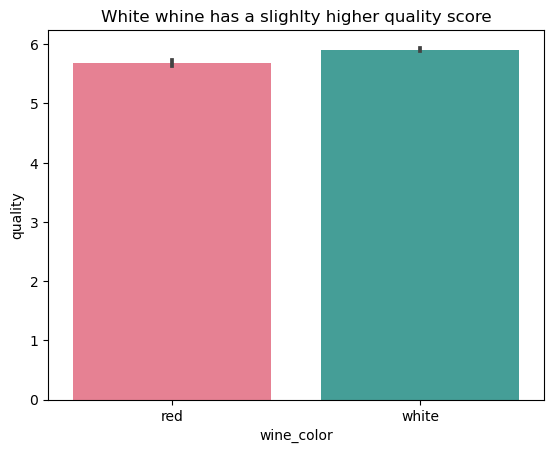

In [7]:
# create vizualization
sns.barplot(x = 'wine_color', y = 'quality', data = train, palette = 'husl')
plt.title('White whine has a slighlty higher quality score')
plt.show()

> The wine colors are: 0.0 = White, 1.0 = Red.

The type of test: Categorical vs Continous is a Comparison on Means test. <br>
**Assumptions:** <br>
- Normaly Distributed: Quality is not normally distributed.
- Subpop vs subpop = Mann Whitneyu test.

In [8]:
# complete the test: 
red = train[train.wine_color == 'red'].quality
white = train[train.wine_color == 'white'].quality

stat, p_val = stats.mannwhitneyu(red, white)
if p_val < 0.05:
    print('We can reject the null hypothesis; the means are different.')
    print(f'P_value: {p_val}')
else:
    print('We cannot reject the null hypothesis')

We can reject the null hypothesis; the means are different.
P_value: 3.584515576519506e-12


> White wine tends to have a higher quality compared to red wine. This could be a good feature to look at.

## 2. Is there a relationship between quality and alcohol?
$H_0$: There is no monotonic relationship between quality and alcohol. <br>
$H_a$: There is a monotonic relationship between quality and alcohol.

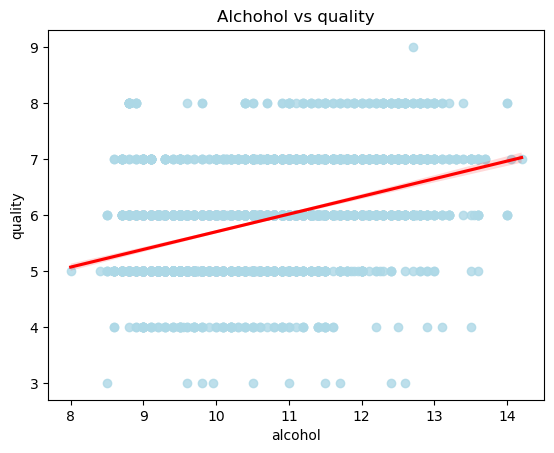

In [9]:
# graph: 
sns.regplot(data = train, x = 'alcohol', y = 'quality', line_kws={'color':'red'}, color = 'lightblue')
plt.title('Alchohol vs quality')
plt.show()

The type of test: Continous vs Continous is a Correlation test. <br>
**Assumptions:** <br>
- Normaly Distributed: Quality is not normally distributed
- Subpop vs subpop = Spearman's r

In [10]:
#complete a spearmans test: 
r, p = stats.spearmanr(train['alcohol'], train.quality)
ex.eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: 0.438994.
P-value: 1.9826706494849643e-162


> There appears to be a relationship between wine quality and alcohol content. It looks like as alcohol content increaes so does wine quality!

# 3. Is there a relationship between quality and chlorides?
$H_0$: There is no monotonic relationship between quality and chlorides. <br>
$H_a$: There is a monotonic relationship between quality and chlorides.

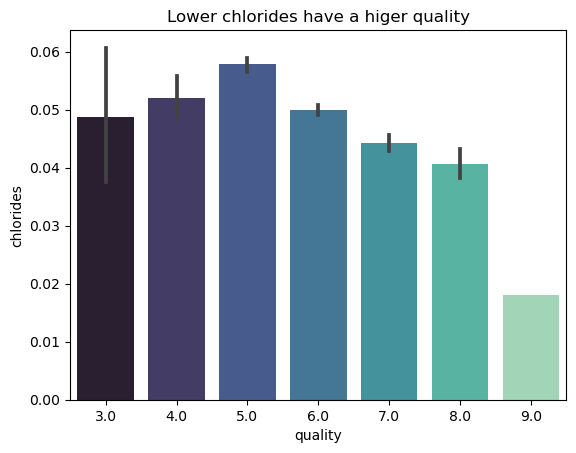

In [11]:
#graph: 
sns.barplot(x = 'quality', y = 'chlorides', data = train, palette = 'mako')
plt.title('Lower chlorides have a higer quality')
plt.show()

In [12]:
# complete a spearmans r test: 
r, p = stats.spearmanr(train['chlorides'], train.quality)
ex.eval_Spearmanresult(r,p)

We reject H₀, there appears to be a monotonic relationship.
Spearman's rs: -0.281351.
P-value: 9.401498914241552e-64


# Clustering: 
- Features that may have potential clusters: 
    - Alcohol vs Sulphates
    - Citric Acid vs pH
    - Free sulfur dioxide vs Total sulfur dioxide
    - Volatile acidity vs density

## Cluster 1

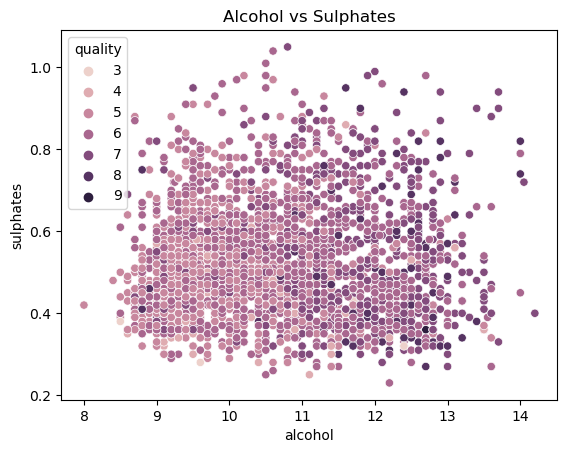

In [15]:
# create the cluster: 
sns.scatterplot(x = 'alcohol', y = 'sulphates', data = train, hue = 'quality')
plt.title('Alcohol vs Sulphates')
plt.show()

> There is a trend in the clusters: As alcholol is over 11 there seems to be a higher percentage in quality.

## Cluster 2

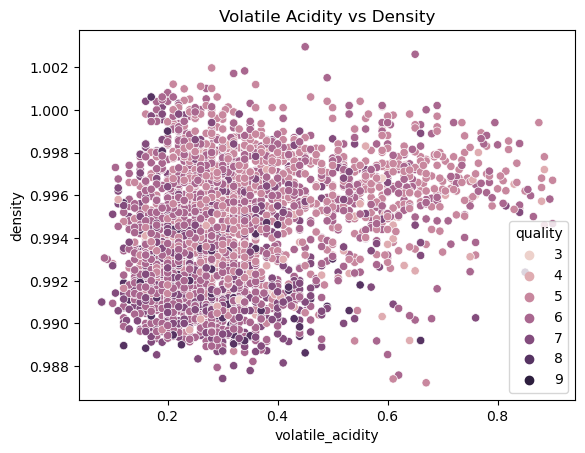

In [25]:
sns.scatterplot(x = 'volatile_acidity', y = 'density', data = train, hue = 'quality')
plt.title('Volatile Acidity vs Density')
plt.show()

> As volatile acidity and density decreases there seems to be a increase in quality of the wine. Vise Versa as densityu increases a volative acidity increases the quality decreases.

# Cluster 3

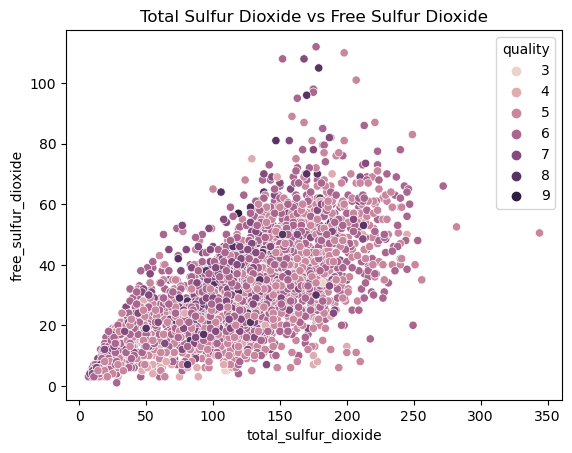

In [28]:
sns.scatterplot(x = 'total_sulfur_dioxide', y = 'free_sulfur_dioxide', data = train, hue = 'quality')
plt.title('Total Sulfur Dioxide vs Free Sulfur Dioxide')
plt.show()

> As free sulufur dioxide and total sulfur dioxide increase it looks quality increases. The lower quality wines tend to stay around lower free sul